### Preamble and Datasets

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#Breast cancer dataset
cancer=load_breast_cancer()
(X_cancer,y_cancer)=load_breast_cancer(return_X_y=True)

#Fruits dataset
fruits=pd.read_table('C:\\Users\\abhir\\OneDrive\\Desktop\\Data Science using Python\\course1_downloads\\course1_downloads\\fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']]-1

y_fruits

,fruit_label
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,0
9,0


### Dimensionality Reduction and  Manifold Learning

#### Principal Component Analysis(PCA)

##### Using PCA to find the first two principal components of the breast cancer dataset

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
(X_cancer,y_cancer)=load_breast_cancer(return_X_y=True)

#Before applying PCA each feature should be centered(zero mean) and with unit variance
X_normalized=StandardScaler().fit(X_cancer).transform(X_cancer)
pca=PCA(n_components=2).fit(X_normalized)
X_pca=pca.transform(X_normalized)
print(X_cancer.shape,X_pca.shape)

(569, 30) (569, 2)


### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


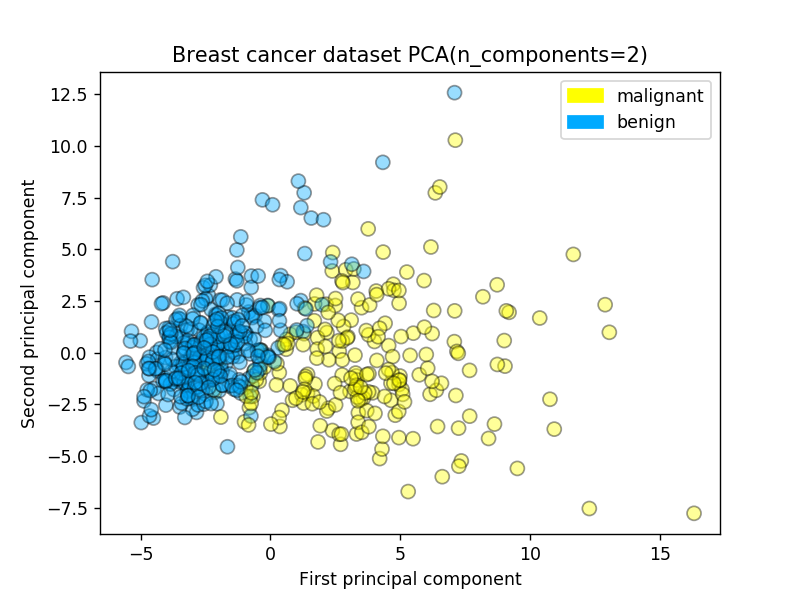

Text(0.5, 1.0, 'Breast cancer dataset PCA(n_components=2)')

In [5]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca,y_cancer,['malignant','benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast cancer dataset PCA(n_components=2)')


### Plotting the magnitude of each feature value for the first two prinicpal components

<IPython.core.display.Javascript object>


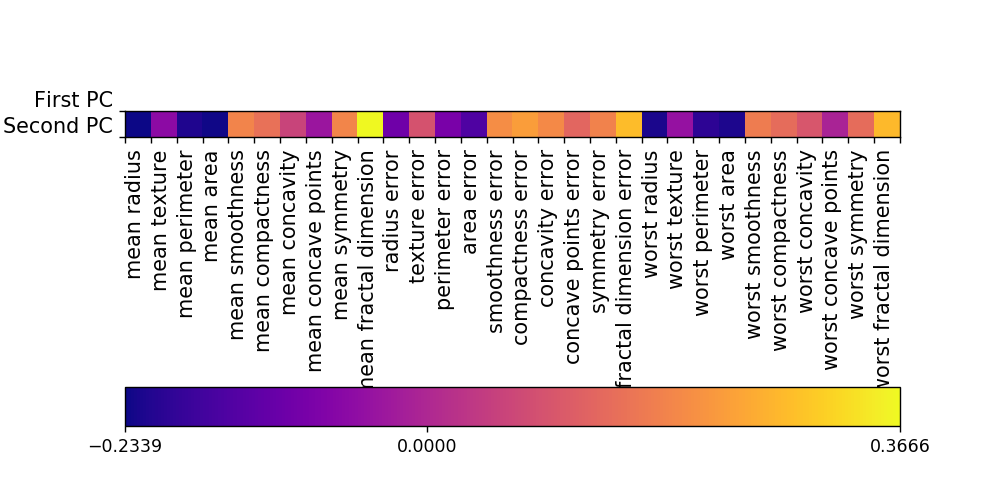

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

### PCA on the fruit dataset(for comparison)

<IPython.core.display.Javascript object>


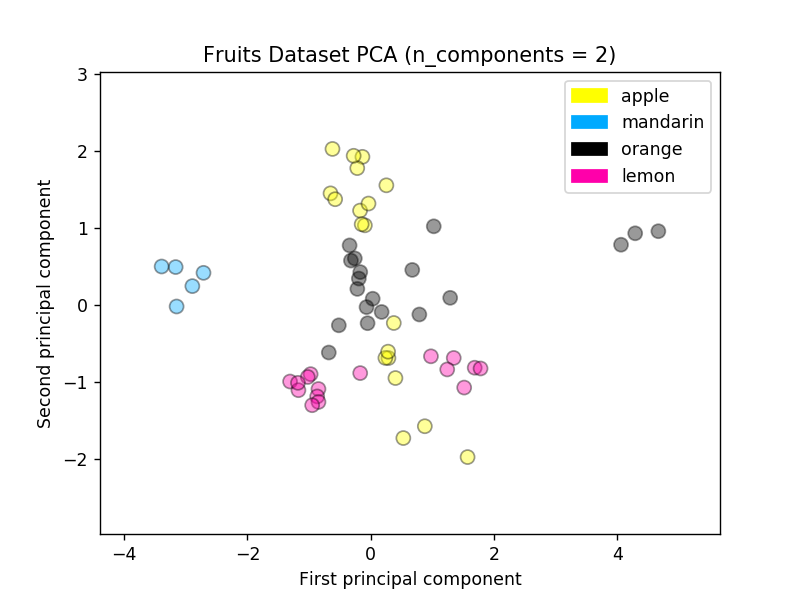

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
#label=np.array(['apple','mandarin','orange','lemon'])
plot_labelled_scatter(X_pca,y_fruits,['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');


### Manifold learning methods

### Multidimemsional scaling(MDS) on the fruit dataset

<IPython.core.display.Javascript object>


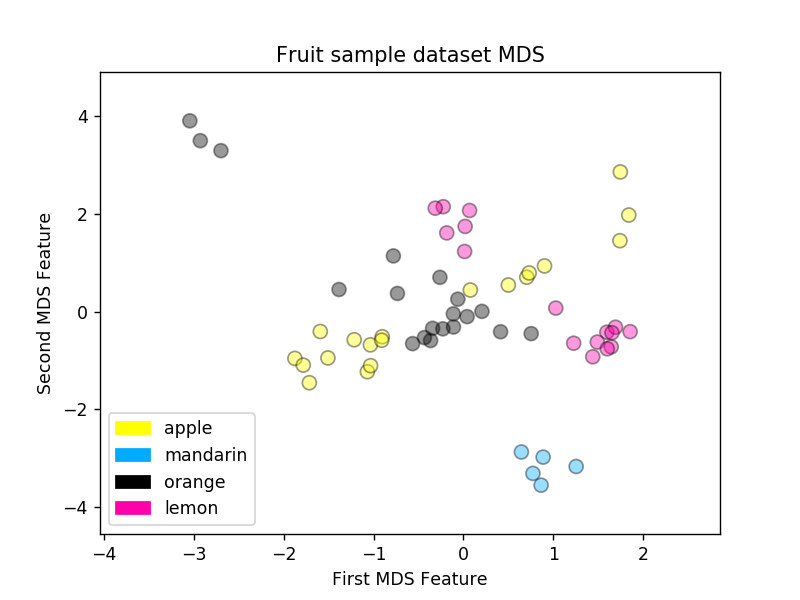

In [10]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

#each feature should be centered(zero mean) and with unit variance
X_fruits_normalized=StandardScaler().fit(X_fruits).transform(X_fruits)
mds=MDS(n_components=2)
X_fruits_mds=mds.fit_transform(X_fruits_normalized)
plot_labelled_scatter(X_fruits_mds,y_fruits,['apple','mandarin','orange','lemon']);
plt.xlabel('First MDS Feature')
plt.ylabel('Second MDS Feature')
plt.title('Fruit sample dataset MDS');

### t-SNE on the fruit dataset 

<IPython.core.display.Javascript object>


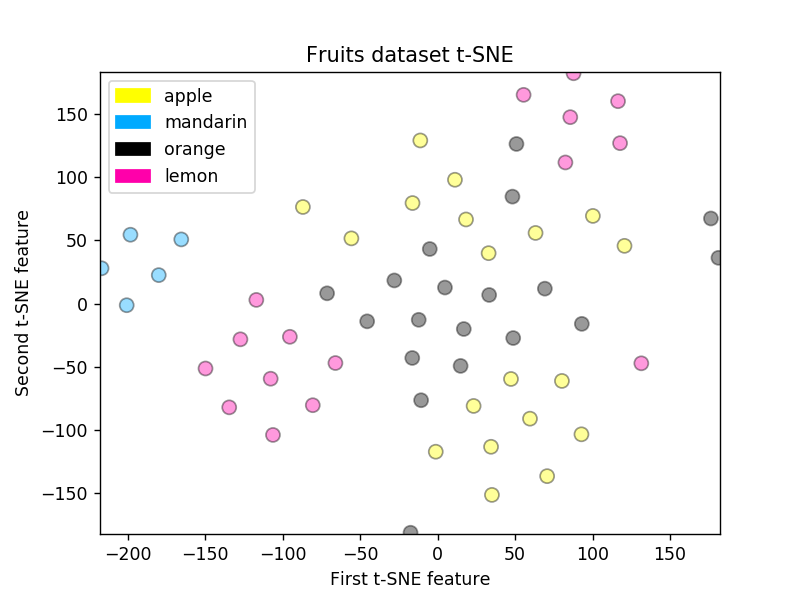

In [12]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=0)

X_tsne=tsne.fit_transform(X_fruits_normalized)
plot_labelled_scatter(X_tsne,y_fruits,['apple','mandarin','orange','lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

### t-SNE on breast cancer dataset

In [14]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

<IPython.core.display.Javascript object>

ValueError: 'c' argument has 569 elements, which is not acceptable for use with 'x' with size 59, 'y' with size 59.

### Clustering

### K-means

<IPython.core.display.Javascript object>


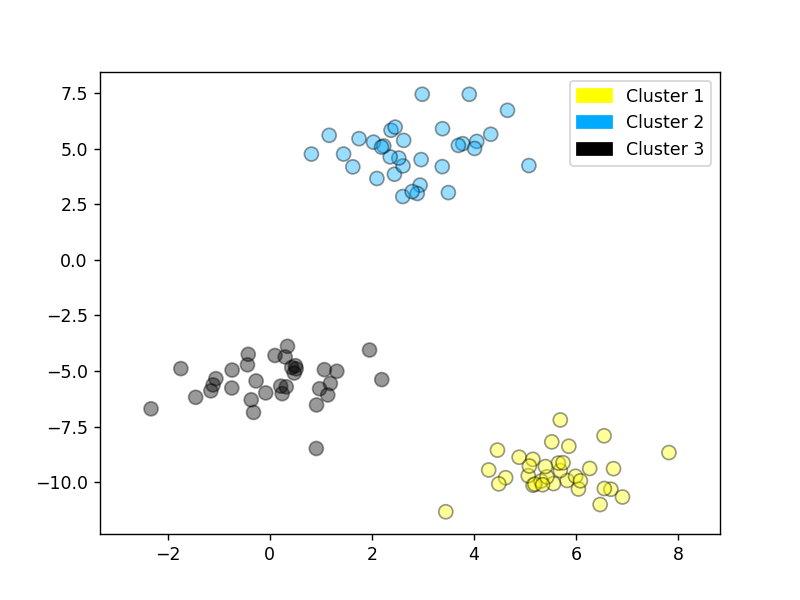

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
X,y=make_blobs(random_state=10)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
plot_labelled_scatter(X, kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3'])



C:\Users\abhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


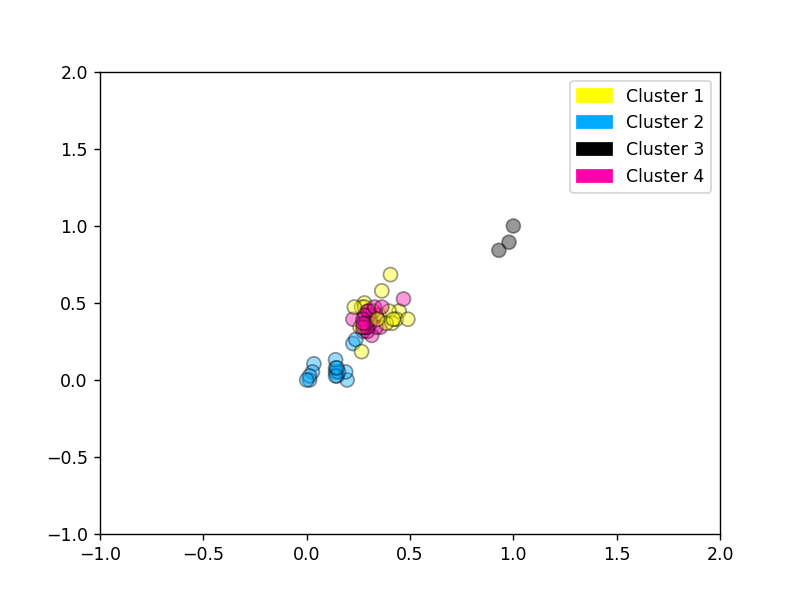

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler
fruits=pd.read_table('C:\\Users\\abhir\\OneDrive\\Desktop\\Data Science using Python\\course1_downloads\\course1_downloads\\fruit_data_with_colors.txt')
X_fruits=fruits[['mass','width','height','color_score']].as_matrix()
y_fruits=fruits[['fruit_label']]-1
X_fruits_normalized=MinMaxScaler().fit(X_fruits).transform(X_fruits)
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_fruits_normalized)
plot_labelled_scatter(X_fruits_normalized,kmeans.labels_,['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

## Agglomerative clustering

<IPython.core.display.Javascript object>


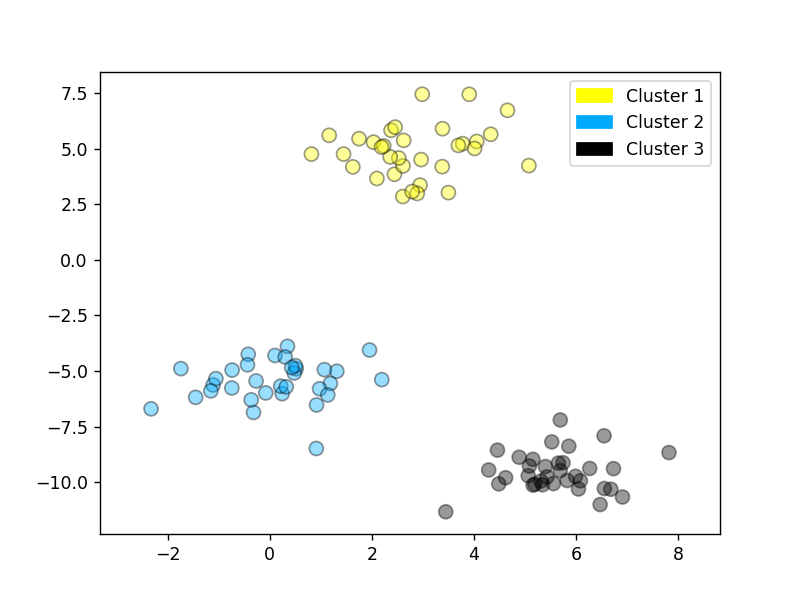

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter
X,y=make_blobs(random_state=10)
cls=AgglomerativeClustering(n_clusters=3)
cls_assignment=cls.fit_predict(X)
plot_labelled_scatter(X,cls_assignment,['Cluster 1', 'Cluster 2', 'Cluster 3'])

### Creating a dendrogram(using scipy)

<IPython.core.display.Javascript object>


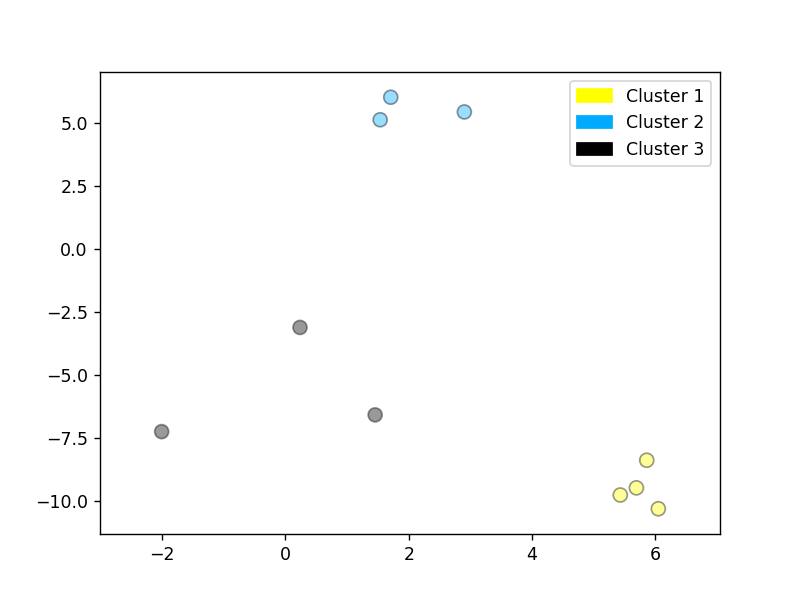

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [25]:
X,y=make_blobs(random_state=10,n_samples=10)
plot_labelled_scatter(X,y,['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

<IPython.core.display.Javascript object>


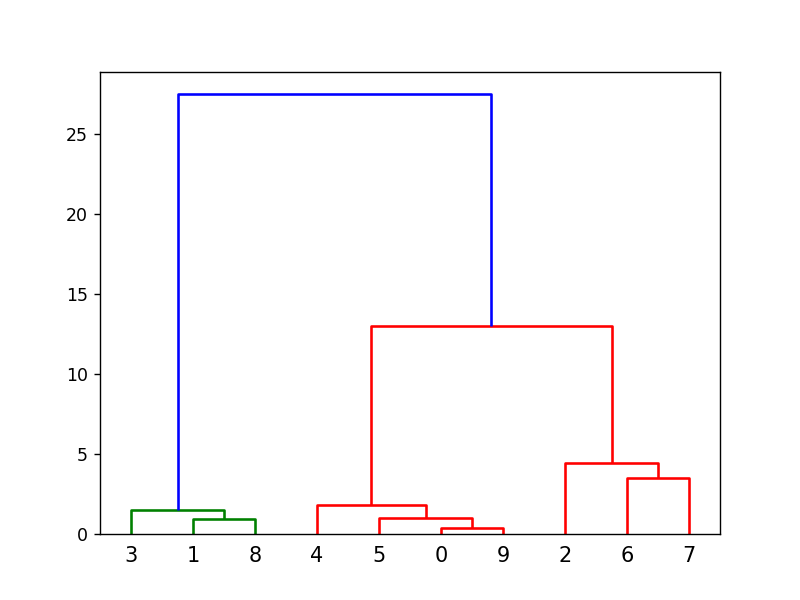

In [26]:
from scipy.cluster.hierarchy import ward,dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


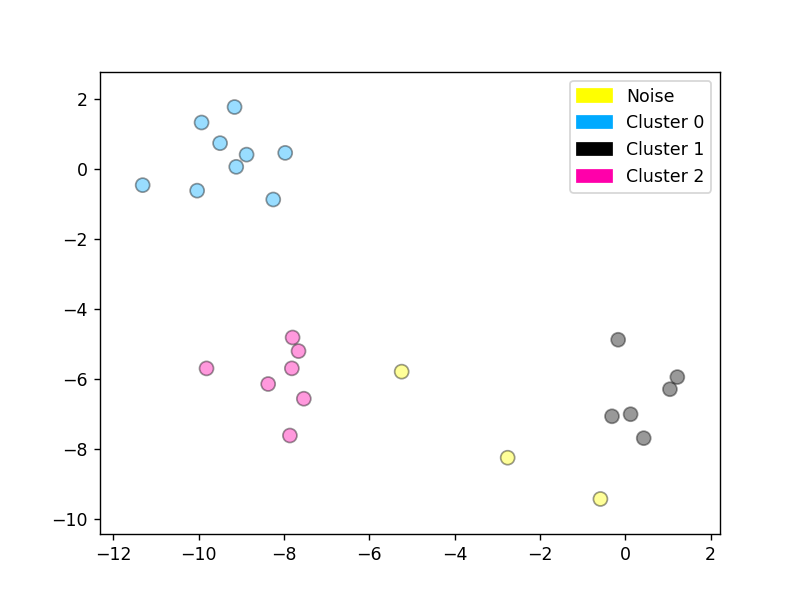

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=9,n_samples=25)

dbscan=DBSCAN(eps=2,min_samples=4)
cls=dbscan.fit_predict(X)
print('Cluster membership values:\n{}'.format(cls))
plot_labelled_scatter(X,cls+1,['Noise','Cluster 0','Cluster 1','Cluster 2'])